In [142]:
from datetime import datetime, timedelta

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib.dates as mdates
from matplotlib.dates import DayLocator, DateFormatter

In [231]:
synop = pd.read_excel('/Users/varungandhi/Downloads/Budapest-44527-10-perces.xlsx')
synop = synop.rename(columns = {'idő (CET)':'Time (CET)'})
synop_nov = synop[(synop['Time (CET)'] >= '2020-11-20 19:30:00') & (synop['Time (CET)'] <= '2020-12-02 13:26:00')]
synop_nov = synop_nov.reset_index()
synop_nov['Time (CET)'] = pd.to_datetime(synop_nov['Time (CET)'])
synop_nov = synop_nov.resample('30min', on = 'Time (CET)', closed = 'left').mean()

In [232]:
synop_nov.reset_index(inplace = True)

In [145]:
fluxes = pd.read_excel('/Volumes/Seagate Backup Plus Drive/data_exp1/energy budget.xlsm',sheet_name= 'figures')

In [146]:
fluxes.head()

Timestamp         DOY   H  LE    Rn_corr  G_tot_cor       RN-G  \
0 2020-11-20 19:30:00    325.8125 NaN NaN -37.941600 -40.995702   3.054102   
1 2020-11-20 20:00:00  325.833333 NaN NaN -50.373967 -37.561663 -12.812304   
2 2020-11-20 20:30:00  325.854167 NaN NaN -50.651367 -39.896157 -10.755209   
3 2020-11-20 21:00:00     325.875 NaN NaN -37.166400 -38.346253   1.179853   
4 2020-11-20 21:30:00  325.895833 NaN NaN -16.737867 -26.485014   9.747147   

   H+LE  Rn-G/H+LE  FOG(humidity)  Fog (LW)  Rn-(H+LE+G)  Unnamed: 12  
0   NaN        NaN            NaN       NaN          NaN          NaN  
1   NaN        NaN            NaN       NaN          NaN          NaN  
2   NaN        NaN            NaN       NaN          NaN          NaN  
3   NaN        NaN            NaN       NaN          NaN          NaN  
4   NaN        NaN            NaN       NaN          NaN          NaN

In [147]:
fluxes['Timestamp'] = pd.to_datetime(fluxes['Timestamp'])

In [148]:
fluxes['Timestamp']

0     2020-11-20 19:30:00
1     2020-11-20 20:00:00
2     2020-11-20 20:30:00
3     2020-11-20 21:00:00
4     2020-11-20 21:30:00
              ...        
569                   NaT
570                   NaT
571                   NaT
572                   NaT
573                   NaT
Name: Timestamp, Length: 574, dtype: datetime64[ns]

In [149]:
fluxes_n = pd.concat([fluxes, synop_nov], axis = 1)


In [150]:
def visibility(lower_value, upper_value,value):
    list_empty = []
    for i in range(len(fluxes_n['V'])):
        if fluxes_n['V'][i] >= lower_value and fluxes_n['V'][i] <= upper_value:
            list_empty.append(value)
        
        else:
            list_empty.append(float('NAN'))
            
    return list_empty

Vis_1000 = visibility( 0, 1000, 20)
Vis_500 = visibility( 0, 500, 50)
Vis_2000 = visibility( 0, 2000, -10)
Vis_5000 = visibility( 0, 5000, -40)
fluxes_n['Vis_1000'] = Vis_1000
fluxes_n['Vis_2000'] = Vis_2000
fluxes_n['Vis_5000'] = Vis_5000
fluxes_n['Vis_500'] = Vis_500

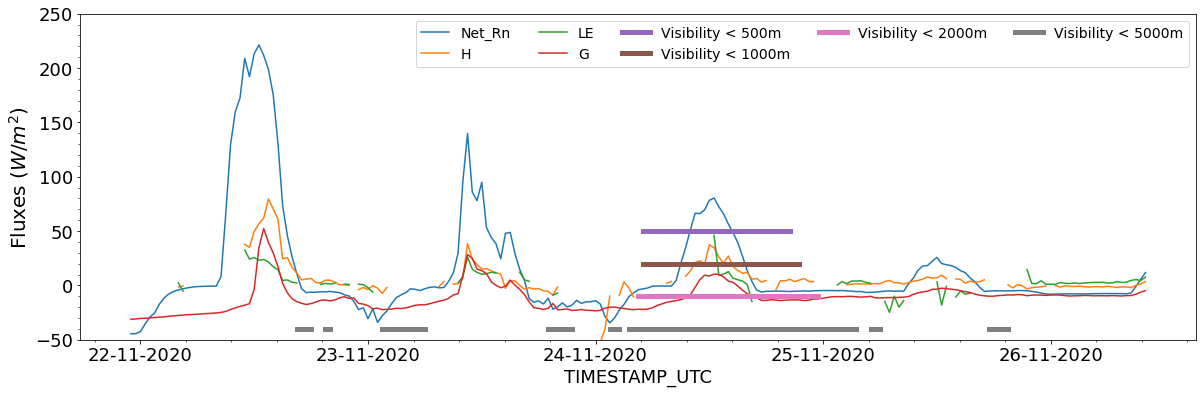

In [151]:
fig, ax = plt.subplots(1)
plt.rcParams["figure.figsize"] = (20,6)
params = {'mathtext.default': 'regular' }          
ax.plot(fluxes_n['Timestamp'][55:270],fluxes_n['Rn_corr'][55:270], label = 'Net_Rn')
ax.plot(fluxes_n['Timestamp'][55:270],fluxes_n['H'][55:270], label = 'H')
ax.plot(fluxes_n['Timestamp'][55:270],fluxes_n['LE'][55:270], label = 'LE')

ax.plot(fluxes_n['Timestamp'][55:270],fluxes_n['G_tot_cor'][55:270], label = 'G')
#ax.plot(fluxes_n['Timestamp'][55:270],fluxes_n['Rn-(H+LE+G)'][55:270], label = 'Net_Rn')

ax.plot(fluxes_n['Timestamp'][55:270],fluxes_n['Vis_500'][55:270], label = 'Visibility < 500m', linewidth = 5)
ax.plot(fluxes_n['Timestamp'][55:270],fluxes_n['Vis_1000'][55:270], label = 'Visibility < 1000m',linewidth = 5)
ax.plot(fluxes_n['Timestamp'][55:270],fluxes_n['Vis_2000'][55:270], label = 'Visibility < 2000m',linewidth = 5)
ax.plot(fluxes_n['Timestamp'][55:270],fluxes_n['Vis_5000'][55:270], label = 'Visibility < 5000m',linewidth = 5)


ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=8)
ax.tick_params(axis='x', labelrotation=0)

ax.set_ylim([-50,250])
ax.set_yticks(np.arange(-50,300, 50.0))
ax.legend(loc= 'upper right', prop={'size': 14}, ncol = 5)
ax.set_xlabel('TIMESTAMP_UTC', fontsize=18)
ax.set_ylabel('Fluxes ($W/m^2$)', fontsize=20)


ax.minorticks_on()
ax.xaxis.set_major_locator(DayLocator())
ax.xaxis.set_major_formatter(DateFormatter("%d-%m-%Y"))

In [152]:
len(fluxes['Timestamp'])

574

In [240]:
synop = pd.read_excel('/Users/varungandhi/Downloads/Budapest-44527-10-perces.xlsx')
synop = synop.rename(columns = {'idő (CET)':'Time (CET)'})
synop = synop[(synop['Time (CET)'] >= '2021-01-27 23:00:00') & (synop['Time (CET)'] <= '2021-02-06 23:30:00')]
synop = synop.reset_index()
synop['Time (CET)'] = pd.to_datetime(synop['Time (CET)'])
synop = synop.resample('30min', on = 'Time (CET)', closed = 'left').mean()
synop.reset_index(inplace = True)

In [192]:
df_gflux = pd.read_excel('/Volumes/Seagate Backup Plus Drive/data_exp1/g_stor.xlsm', None)
df_gflux.keys()

dict_keys(['Sheet1', 'Sheet2', 'gstor', 'Sheet4', 'finale', 'feb'])

In [193]:
df_gflux = pd.read_excel('/Volumes/Seagate Backup Plus Drive/data_exp1/g_stor.xlsm', sheet_name= 'finale',
                        skiprows= 1)

In [194]:
ab = pd.date_range(start='2020-12-29 15:40:00', end='2021-05-04 12:40:00', freq= '10min')

In [195]:
df_gflux['datee'] = ab

In [196]:
df_gflux = df_gflux[(df_gflux['datee'] >= '2021-01-28 00:00:00') & 
                     (df_gflux['datee'] <= '2021-02-06 23:30:00')]


In [197]:
df_gflux = df_gflux.resample('30min', on = 'datee', closed = 'left').mean()
df_gflux.reset_index(inplace = True)

In [198]:
df_netrad = pd.read_csv('/Volumes/Seagate Backup Plus Drive/data_exp1/NetRad_30min.csv', None)
df_netrad.keys()

/Applications/anaconda3/envs/ARUN/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)
/Applications/anaconda3/envs/ARUN/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


Index(['time', 'V3', 'V4', 'V5', 'V6', 'global', 'reflex', 'Lupper', 'Llower',
       'Net_rn'],
      dtype='object')

In [199]:
flux_1 = pd.read_csv('/Users/varungandhi/Downloads/eddypro_csat_full_output_2021-10-25T215503_exp.csv', skiprows= 1)

In [200]:
flux_1.columns

Index(['filename', 'date', 'time', 'DOY', 'daytime', 'file_records',
       'used_records', 'Tau', 'qc_Tau', 'H',
       ...
       'h2o_spikes', 'u_var', 'v_var', 'w_var', 'ts_var', 'co2_var', 'h2o_var',
       'w/ts_cov', 'w/co2_cov', 'w/h2o_cov'],
      dtype='object', length=110)

In [201]:
ustar_1 = flux_1['u*'].iloc[0:]
flux_1 = flux_1.iloc[0:, 0:14]
flux_1.reset_index(inplace= True)
flux_1 = pd.concat([flux_1, ustar_1], axis = 1)
flux_1 = flux_1[1:]
flux_1.reset_index(inplace = True, drop = True)

In [202]:
#synop = synop.iloc[6:, :]
#synop = synop.reset_index()

In [203]:
flux_2 = pd.read_csv('/Users/varungandhi/Downloads/eddypro_csat_full_output_2021-10-25T195053_exp.csv', skiprows=1)
ustar_2 = flux_2['u*'].iloc[0:]
flux_2 = flux_2.iloc[0:, 0:14]

flux_2.reset_index(inplace = True)
flux_2 = pd.concat([flux_2, ustar_2], axis = 1)
flux_2 = flux_2[1:]
flux_2.reset_index(inplace = True, drop = True)

In [204]:
flux_feb = pd.concat([flux_1, flux_2], axis = 0, ignore_index=True)

In [205]:
flux_feb

index                            filename        date   time      DOY  \
0        1  TOA5_data_0015_2021_01_28_0000.dat  2021-01-28  00:30  28.0208   
1        2  TOA5_data_0015_2021_01_28_0030.dat  2021-01-28  01:00  28.0416   
2        3  TOA5_data_0015_2021_01_28_0100.dat  2021-01-28  01:30  28.0624   
3        4  TOA5_data_0015_2021_01_28_0130.dat  2021-01-28  02:00  28.0833   
4        5  TOA5_data_0015_2021_01_28_0200.dat  2021-01-28  02:30  28.1041   
..     ...                                 ...         ...    ...      ...   
475    236  TOA5_data_0016_2021_02_06_2130.dat  2021-02-06  22:00  37.9165   
476    237  TOA5_data_0016_2021_02_06_2200.dat  2021-02-06  22:30  37.9373   
477    238  TOA5_data_0016_2021_02_06_2230.dat  2021-02-06  23:00  37.9581   
478    239  TOA5_data_0016_2021_02_06_2300.dat  2021-02-06  23:30  37.9790   
479    240  TOA5_data_0016_2021_02_06_2330.dat  2021-02-07  00:00  38.0000   

    daytime file_records used_records           Tau qc_Tau          H qc_H  \
0         0        18000        18000   9.57642E-03      1   -4.01973    2   
1         0        18000        18000   5.24325E-03      1   -1.98099    2   
2         0        18000        18000  -2.38782E-03      1   -3.90310    0   
3         0        18000        18000  -5.83205E-03      0   -14.3384    0   
4         0        18000        18000   -1.7783E-02      0   -18.4214    0   
..      ...          ...          ...           ...    ...        ...  ...   
475       0        18000        18000  -9.96364E-02      0  -0.394083    1   
476       0        18000        18000     -0.128393      0   -2.42488    2   
477       0        18000        18000     -0.142629      0   -4.11050    1   
478       0        18000        18000     -0.154636      0   -4.38661    1   
479       0        18000        18000     -0.153796      0   0.192608    2   

               LE qc_LE  co2_flux           u*  
0        -1.24455     1  -1.83029  8.66207E-02  
1        0.726863     2  -1.43227  6.39852E-02  
2    -3.05648E-02     2   1.17917  4.31856E-02  
3        0.114515     1   2.19109  6.75501E-02  
4       -0.180282     2   2.36552     0.117879  
..            ...   ...       ...          ...  
475      -18.3765     0   29.9711     0.282076  
476           NaN     2   135.219     0.320159  
477       6.93586     1   5.81604     0.337316  
478       9.47843     0  -2.83356     0.350994  
479       10.2427     0   1.41065     0.349955  

[480 rows x 16 columns]

In [206]:
df_netrad = df_netrad[(df_netrad['time'] >= '2021-01-28 00:00:00') & 
                      (df_netrad['time'] <= '2021-02-06 23:30:00')]


In [207]:

df_netrad.reset_index(inplace= True, drop= True)
df_netrad.shape

(480, 10)

In [208]:
synop.shape

(474, 21)

In [209]:
flux_feb.shape

(480, 16)

In [210]:
flux_feb.columns

Index(['index', 'filename', 'date', 'time', 'DOY', 'daytime', 'file_records',
       'used_records', 'Tau', 'qc_Tau', 'H', 'qc_H', 'LE', 'qc_LE', 'co2_flux',
       'u*'],
      dtype='object')

In [211]:
synop.columns

Index(['level_0', 'Time (CET)', 'index', 'T', 'U', 'P', 'FS', 'FSD', 'R', 'V',
       'SR', 'SREF', 'SAL', 'SSUL', 'ET10', 'ET20', 'ET50', 'ET100', 'EU10',
       'EU20', 'EU50'],
      dtype='object')

In [212]:
flux_feb= flux_feb.drop('time', axis = 1)


In [241]:
flux_feb_final = pd.concat([flux_feb,synop, df_netrad, df_gflux], axis=1)

In [242]:
flux_feb_final.index = flux_feb_final['datee']

In [243]:

flux_feb_final['H_corr'] = pd.to_numeric(flux_feb_final['H'])
x = pd.to_numeric(flux_feb_final['LE'])
a = np.array(x.values.tolist())
b = np.where((a <= -70.0), np.nan, a)
c = np.where(b >= 100.0, np.nan, b)
flux_feb_final['LE_c'] = c

In [244]:
def visibility(lower_value, upper_value,value):
    list_empty = []
    for i in range(len(flux_feb_final['V'])):
        if flux_feb_final['V'][i] >= lower_value and flux_feb_final['V'][i] <= upper_value:
            list_empty.append(value)
        
        else:
            list_empty.append(float('NAN'))
            
    return list_empty

Vis_1000 = visibility( 0, 1000, 0.1)
Vis_500 = visibility( 0, 500,0.15 )
Vis_2000 = visibility( 0, 2000, 0.05)
Vis_5000 = visibility( 0, 5000, 0)
flux_feb_final['Vis_1000'] = Vis_1000
flux_feb_final['Vis_2000'] = Vis_2000
flux_feb_final['Vis_5000'] = Vis_5000
flux_feb_final['Vis_500'] = Vis_500

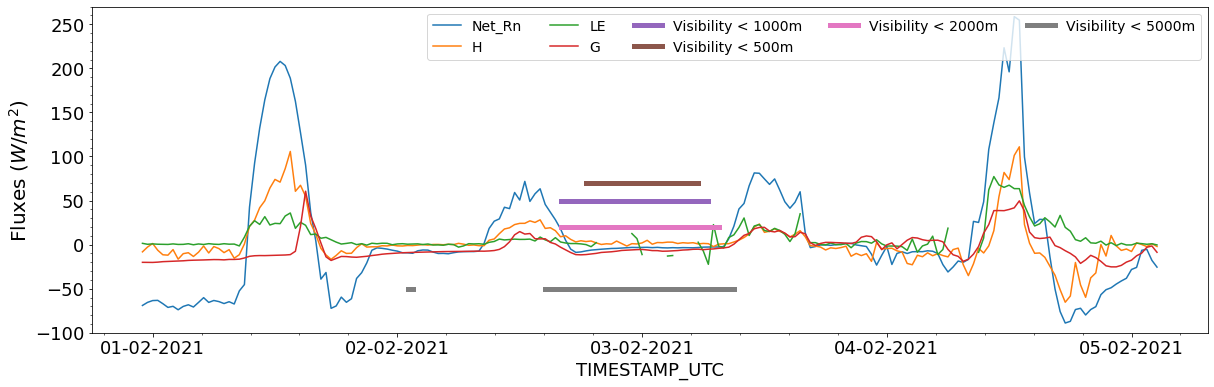

In [39]:
fig, ax = plt.subplots(1)
plt.rcParams["figure.figsize"] = (20,6)
params = {'mathtext.default': 'regular' }          

ax.plot(flux_feb_final['Net_rn'][190:390], label = 'Net_Rn')

ax.plot(flux_feb_final['H_corr'][190:390] ,label = 'H')
ax.plot(flux_feb_final['LE_c'][190:390] ,label = 'LE')
ax.plot(flux_feb_final['soil_flux'][190:390] ,label = 'G')


ax.plot(flux_feb_final['Vis_1000'][190:390], linewidth=5, label = 'Visibility < 1000m')
ax.plot(flux_feb_final['Vis_500'][190:390], linewidth=5, label = 'Visibility < 500m')
ax.plot(flux_feb_final['Vis_2000'][190:390], linewidth=5, label = 'Visibility < 2000m')
ax.plot(flux_feb_final['Vis_5000'][190:390], linewidth=5, label = 'Visibility < 5000m')




ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=8)
ax.tick_params(axis='x', labelrotation=0)

ax.set_ylim([-70,270])
ax.set_yticks(np.arange(-100,270, 50.0))
ax.legend(loc= 'upper right', prop={'size': 14}, ncol = 5)
ax.set_xlabel('TIMESTAMP_UTC', fontsize=18)
ax.set_ylabel('Fluxes ($W/m^2$)', fontsize=20)



ax.minorticks_on()
ax.xaxis.set_major_locator(DayLocator())
ax.xaxis.set_major_formatter(DateFormatter("%d-%m-%Y"))

In [40]:
flux_feb_final.columns

Index(['index', 'filename', 'date', 'DOY', 'daytime', 'file_records',
       'used_records', 'Tau', 'qc_Tau', 'H', 'qc_H', 'LE', 'qc_LE', 'co2_flux',
       'u*', 'level_0', 'Time (CET)', 'index', 'T', 'U', 'P', 'FS', 'FSD', 'R',
       'V', 'SR', 'SREF', 'SAL', 'SSUL', 'ET10', 'ET20', 'ET50', 'ET100',
       'EU10', 'EU20', 'EU50', 'time', 'V3', 'V4', 'V5', 'V6', 'global',
       'reflex', 'Lupper', 'Llower', 'Net_rn', 'datee', 'DTS', 'SW5', 'Gstor',
       'Hske', 'soil_flux', 'H_corr', 'LE_c', 'Vis_1000', 'Vis_2000',
       'Vis_5000', 'Vis_500'],
      dtype='object')

Text(0, 0.5, 'U ($m/s$)')

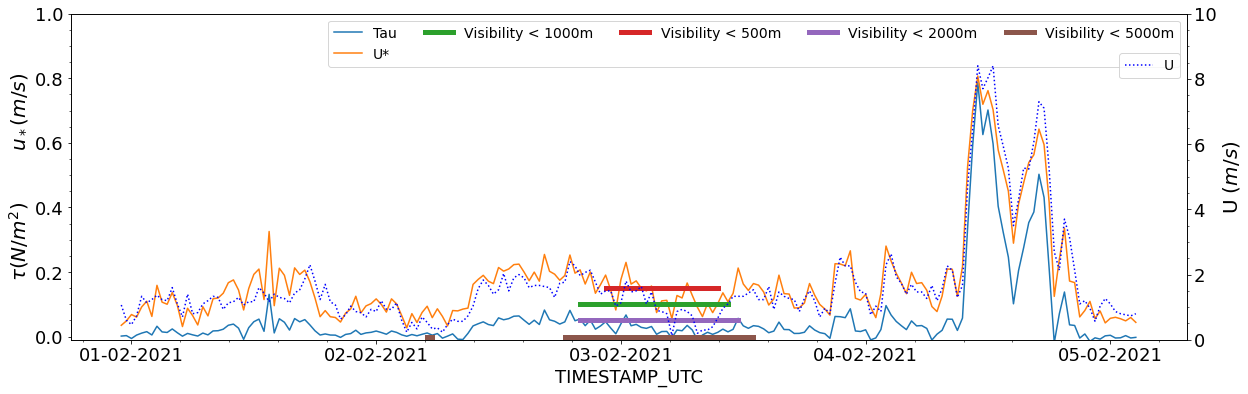

In [298]:
flux_feb_final['Tau'] = pd.to_numeric(flux_feb_final['Tau'])
flux_feb_final['u*'] = pd.to_numeric(flux_feb_final['u*'])

fig, ax = plt.subplots(1)
plt.rcParams["figure.figsize"] = (20,6)
params = {'mathtext.default': 'regular' }          

ax.plot(-flux_feb_final['Tau'][190:390], label = 'Tau')
ax.plot(flux_feb_final['u*'][190:390], label = 'U*')
ax.legend(loc= 'upper left', prop={'size': 14}, ncol = 5)

ax.plot(flux_feb_final['Vis_1000'][190:390], linewidth=5, label = 'Visibility < 1000m')
ax.plot(flux_feb_final['Vis_500'][190:390], linewidth=5, label = 'Visibility < 500m')
ax.plot(flux_feb_final['Vis_2000'][190:390], linewidth=5, label = 'Visibility < 2000m')
ax.plot(flux_feb_final['Vis_5000'][190:390], linewidth=5, label = 'Visibility < 5000m')



ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=8)
ax.tick_params(axis='x', labelrotation=0)


ax.set_ylim([-0.01, 1])
#ax.set_yticks(np.arange(0.0, 0.1, 0.01))
ax.legend(loc= 'upper right', prop={'size': 14}, ncol = 5)
ax.set_xlabel('TIMESTAMP_UTC', fontsize=18)
ax.set_ylabel('$τ $($N/m^2$)        $u_*(m/s)$', fontsize=20)

ax.minorticks_on()
ax.xaxis.set_major_locator(DayLocator())
ax.xaxis.set_major_formatter(DateFormatter("%d-%m-%Y"))



ax2 = ax.twinx() 
ax2.plot(flux_feb_final['FS'][190:390], label = 'U', color = 'b', linestyle = 'dotted')
ax2.legend(loc= 'upper right', prop={'size': 14}, ncol = 5)

ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.tick_params(axis='both', which='minor', labelsize=8)
ax2.tick_params(axis='x', labelrotation=0)


ax2.minorticks_on()
ax2.xaxis.set_major_locator(DayLocator())
ax2.xaxis.set_major_formatter(DateFormatter("%d-%m-%Y"))


ax2.set_ylim([0.0, 8])
ax2.set_yticks(np.arange(0, 12, 2))
ax2.legend(loc= 'upper right', prop={'size': 14}, ncol = 2, bbox_to_anchor=(1,0.9))
ax2.set_xlabel('TIMESTAMP_UTC', fontsize=18)
ax2.set_ylabel('U ($m/s$)', fontsize=20)

In [55]:
flux_feb_final['P'].shape

(480,)

In [44]:
temp = flux_feb_final['T']

In [45]:
temp_kelvin = flux_feb_final['T'] + 273.15

In [53]:
es = 6.11 * (10**((7.5 * temp)/ (237.3 + temp)))

In [55]:
e = (es * flux_feb_final['U'])/100

In [57]:
q =(0.622 * e) / (flux_feb_final['P'] - (0.378 * e))

In [59]:
tv = temp_kelvin * (1 + (0.608 * q)) 

In [65]:
density = flux_feb_final['P']/ (287 * tv)

In [67]:
tau = flux_feb_final['u*'] * density

In [68]:
tau

datee
2021-01-28 00:00:00    0.001114
2021-01-28 00:30:00    0.000824
2021-01-28 01:00:00    0.000556
2021-01-28 01:30:00    0.000871
2021-01-28 02:00:00    0.001522
                         ...   
2021-02-06 21:30:00         NaN
2021-02-06 22:00:00         NaN
2021-02-06 22:30:00         NaN
2021-02-06 23:00:00         NaN
2021-02-06 23:30:00         NaN
Length: 480, dtype: float64

In [115]:
xx = flux_feb_final['Tau']

In [116]:
arr1 = -(xx.values[220:390])

In [117]:
arr2 = tau.values[220:390] * 100

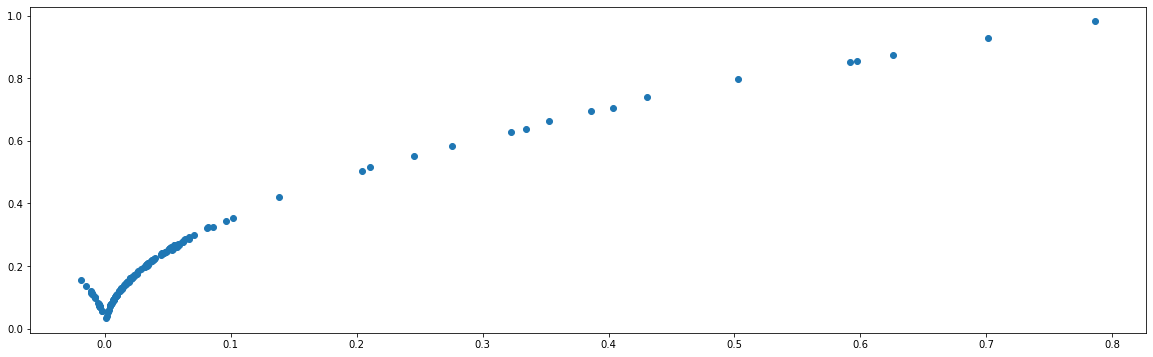

In [118]:
plt.scatter(arr1, arr2)

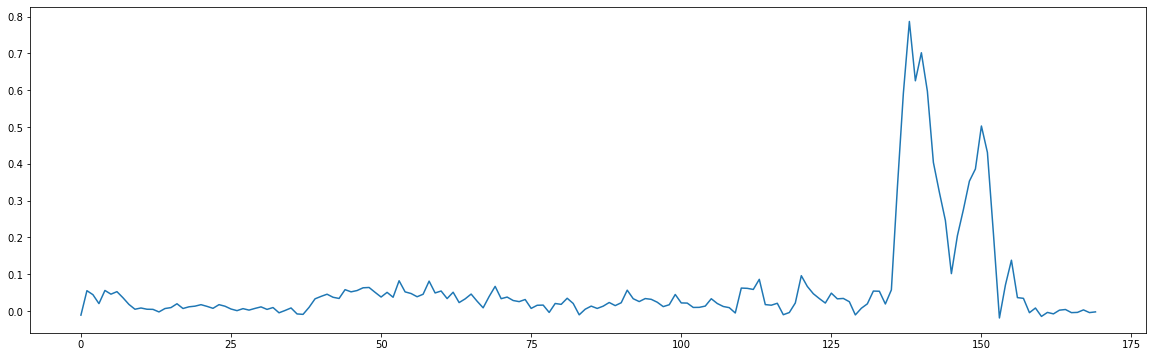

In [119]:
plt.plot(arr1)

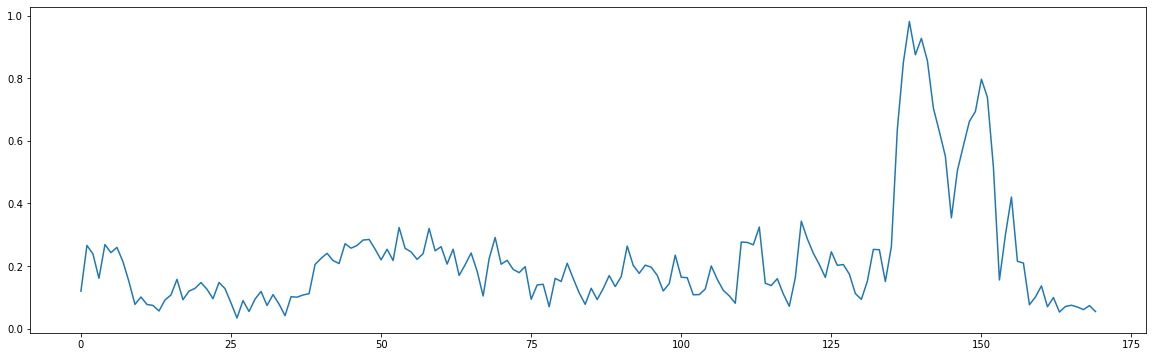

In [120]:
plt.plot(arr2)

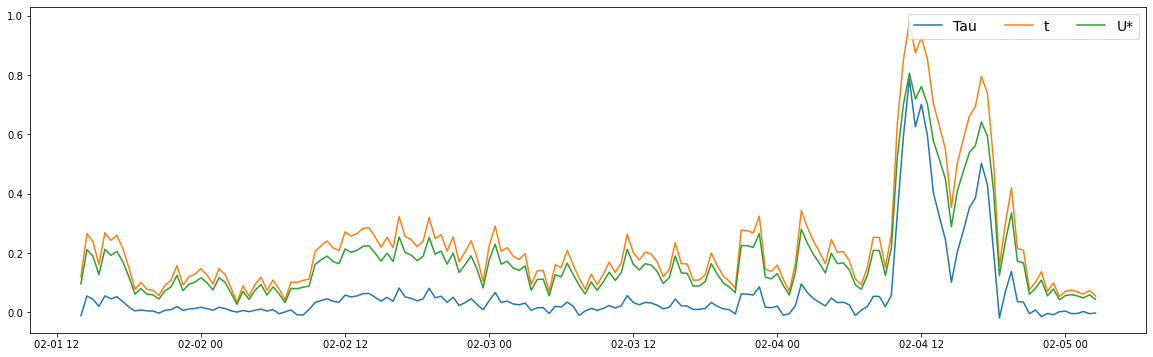

In [134]:
fig, ax = plt.subplots(1)
plt.rcParams["figure.figsize"] = (20,6)
params = {'mathtext.default': 'regular' }          

ax.plot(-flux_feb_final['Tau'][220:390], label = 'Tau')

ax.plot(flux_feb_final.index[220:390],arr2, label = 't')
ax.plot(flux_feb_final['u*'][220:390], label = 'U*')


ax.legend(loc= 'upper right', prop={'size': 14}, ncol = 5)


In [135]:
temp_kelvin

datee
2021-01-28 00:00:00    269.616667
2021-01-28 00:30:00    269.183333
2021-01-28 01:00:00    269.283333
2021-01-28 01:30:00    269.083333
2021-01-28 02:00:00    268.550000
                          ...    
2021-02-06 21:30:00           NaN
2021-02-06 22:00:00           NaN
2021-02-06 22:30:00           NaN
2021-02-06 23:00:00           NaN
2021-02-06 23:30:00           NaN
Name: T, Length: 480, dtype: float64

In [136]:
tv

datee
2021-01-28 00:00:00    269.994323
2021-01-28 00:30:00    269.565383
2021-01-28 01:00:00    269.673157
2021-01-28 01:30:00    269.476272
2021-01-28 02:00:00    268.938572
                          ...    
2021-02-06 21:30:00           NaN
2021-02-06 22:00:00           NaN
2021-02-06 22:30:00           NaN
2021-02-06 23:00:00           NaN
2021-02-06 23:30:00           NaN
Length: 480, dtype: float64